# classification 


# Knn cnocept 


In [1]:
import numpy as np
import matplotlib.pylab as plt 
import pandas as pd

In [2]:
x_train=np.array([5,4,6,6.5,7,8,3.5,1,2.2])
y_train=np.array([1,1,1,1,1,1,0,0,0])

# confusion matrix
# roc curve ,auc also 

Confusion Matrix:
 [[26  6]
 [ 4 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.80      0.86      0.83        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

ROC AUC Score: 0.9095982142857143


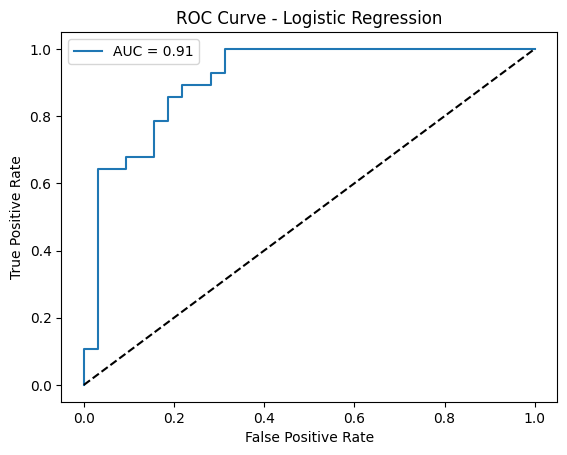

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# 1. Create a simple dataset (binary classification)
X, y = make_classification(n_samples=200, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Train logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 3. Predictions
y_pred = logreg.predict(X_test)                # labels (0 or 1)
y_pred_probs = logreg.predict_proba(X_test)[:, 1]  # probabilities for class 1

# 4. Confusion matrix & classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. ROC curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc_score = roc_auc_score(y_test, y_pred_probs)
print("ROC AUC Score:", auc_score)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [4]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Example data
X = np.array([[i] for i in range(10)])  # features
y = np.array([2*i for i in range(10)])  # labels

# Define KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = LinearRegression()
scores = []

# Loop through folds
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    scores.append(mean_squared_error(y_val, y_pred))

print("MSE per fold:", scores)
print("Average MSE:", np.mean(scores))

MSE per fold: [9.860761315262648e-30, 1.5777218104420236e-30, 7.888609052210118e-30, 0.0, 1.9721522630525295e-30]
Average MSE: 4.259848888193464e-30


In [16]:
X = np.array([[i] for i in range(10)])  # features
y = np.array([2*i for i in range(10)])  # labels

# Define KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [17]:
list(kf.split(X))

[(array([0, 2, 3, 4, 5, 6, 7, 9]), array([1, 8])),
 (array([1, 2, 3, 4, 6, 7, 8, 9]), array([0, 5])),
 (array([0, 1, 3, 4, 5, 6, 8, 9]), array([2, 7])),
 (array([0, 1, 2, 3, 5, 6, 7, 8]), array([4, 9])),
 (array([0, 1, 2, 4, 5, 7, 8, 9]), array([3, 6]))]

In [15]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array([10, 20, 30, 40, 50, 60])  # 6 samples
kf = KFold(n_splits=3, shuffle=False)   # split into 3 folds
list(kf.split(X))

[(array([2, 3, 4, 5]), array([0, 1])),
 (array([0, 1, 4, 5]), array([2, 3])),
 (array([0, 1, 2, 3]), array([4, 5]))]